In [19]:
%cd /casa/chemin/p/bioinfo1_2023/binfo1-datapack1/

/casa/chemin/p/bioinfo1_2023/binfo1-datapack1


In [2]:
!grep -i mirlet7g /casa/chemin/p/bioinfo1_2023/binfo1-datapack1/gencode.gtf

chr9	ENSEMBL	gene	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; gene_type "miRNA"; gene_name "Mirlet7g"; level 3; mgi_id "MGI:2676800";
chr9	ENSEMBL	transcript	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";
chr9	ENSEMBL	exon	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; exon_number 1; exon_id "ENSMUSE00000522665.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";


In [3]:
!samtools view -b -o CLIP-let7g.bam CLIP-35L33G.bam chr9:106056039-106056126
!samtools view CLIP-let7g.bam | wc -l

163


In [4]:
!samtools mpileup CLIP-let7g.bam > CLIP-let7g.pileup
!wc -l CLIP-let7g.pileup

[mpileup] 1 samples in 1 input files
68548 CLIP-let7g.pileup


Mirlet7g는 100bp도 안 되는 짧은 gene인데 `mpileup` 결과는 엄청 길게 나옵니다. 왜 그럴까요? (잘 한 번 생각해 봅시다)

In [5]:
!head CLIP-let7g.pileup

chr9	106007092	N	9	^Ga^Ia^Ha^Ia^Ga^Ga^Ha^Ia^Ia	<IFIGGHII
chr9	106007093	N	9	ggggggggg	AFGIEGDII
chr9	106007094	N	9	ccccccccc	EHHIGAFEH
chr9	106007095	N	9	aaaaaaaaa	?HDIFA>II
chr9	106007096	N	9	aaaaaaaaa	EHHIG@CHH
chr9	106007097	N	9	ttttttttt	=HGEGDFII
chr9	106007098	N	9	aaaaaaaaa	?HHIGDEII
chr9	106007099	N	9	g-2nng-2nng-2nng-2nng-2nng-2nng-2nng-2nng-2nn	?IEHGEDII
chr9	106007100	N	9	*********	8IBIBC@EI
chr9	106007101	N	9	*********	8IBIBC@EI


In [6]:
!awk '$2 >= 106056039 && $2 <= 106056126 { print $0; }' CLIP-let7g.pileup > CLIP-let7g-gene.pileup
!tail CLIP-let7g-gene.pileup

chr9	106056117	N	138	<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC	BHEIG?DIIHGHII:;HGIIDGGGIIBGEB?>H<GGIIIIDIIGFHIHH9IGG=GGHIDH?DGIBIIHHGGIEIGI8GIDHDG.GGHEDIIDIDGDHIDGIFGHG;DCDDHEE@I?CGG:IHGIBGIHIIDG@DHIGG
chr9	106056118	N	139	<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC	BHEIG?DIIHGHII3AHIIIDGGGIIB3EHFBH>GIIIIIIIIIHIIHHAIIGBDGHIDH?GIIGIIHHDIIHIGIGGI=BGG9GIHHHIIGI=IAIIGGIEHGIEBG@DHDE;IBDGG4IGGIGGIIIIGGGDGIH1G
chr9	106056119	N	138	<<<<<<<<<TTTTTTTTTTTTTTTTTTTTTTTTTT$TTTT$TTTTTTTTTTTTTTT$TTTT$TTTTTTT$TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT	BHEIG?DIIGEFII:/GIIEDDHDIIF>BH3<HBEGIHIGFIIIBIIBE:HHGD>EGGDH7BIIGGIHHDHIHDEIGEIDHGG;GIHGHHIGD:IGHD:GGEHH?3G87HD</I=DGG=IHHIHBIFII@<HDHHH1G
chr9	106056120	N	133	<<<<<<<<<TTTTTTTTTTTTTTTTTTTTTTTTTTTT$TTTT$TTT$TTTTTTTTTT$TTTTTTTT$TTTTTTTT

In [2]:
import pandas as pd

pileup = pd.read_csv('/casa/chemin/p/bioinfo1_2023/binfo1-datapack1/CLIP-let7g-gene.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])
pileup.tail()

,chrom,pos,_ref,count,basereads,quals
83,chr9,106056122,N,88,<<<<<<<<<C$C$C$C$C$C$C$C$C$C$C$C$C$CCCCCC$C$C$...,BHEIG?DIIEEGIIC;GIHEGBIIIIB1=FII?FEIGGGHDBIG=H...
84,chr9,106056123,N,31,<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCC,BHEIG?DIIIIII>GIGGIGGD>BIHHHIEH
85,chr9,106056124,N,31,<<<<<<<<<AAAAAAAAAAAAAAAAAAAAAA,BHEIG?DIIIIHIGGIGGGIG:9DDBIEGFH
86,chr9,106056125,N,31,<<<<<<<<<GGGGGGGGGGGGGGGGGGGGGG,BHEIG?DIIIIIIGGE@GFIGD;GIGIIFHD
87,chr9,106056126,N,30,<<<<<<<<<GGGGGGGGGGGGGGGGGGGGG,BHEIG?DIIIIGHGHIGHI>G;GGGIGIHG


여기서 pileup에서 계산에 사용할 것은 match와 substitution만입니다. 나머지에 해당하는 tag들은 제거합니다.

R을 쓰시는 분들은 R로 보내서 작업하셔도 됩니다.

In [3]:
import re
toremove = re.compile('[<>$*#^]')
pileup['matches'] = pileup['basereads'].apply(lambda x: toremove.sub('', x))

In [4]:
pileup

,chrom,pos,_ref,count,basereads,quals,matches
0,chr9,106056039,N,9,<<<<<<<<<,BHEIG?DII,
1,chr9,106056040,N,9,<<<<<<<<<,BHEIG?DII,
2,chr9,106056041,N,9,<<<<<<<<<,BHEIG?DII,
3,chr9,106056042,N,9,<<<<<<<<<,BHEIG?DII,
4,chr9,106056043,N,9,<<<<<<<<<,BHEIG?DII,
...,...,...,...,...,...,...,...
83,chr9,106056122,N,88,<<<<<<<<<C$C$C$C$C$C$C$C$C$C$C$C$C$CCCCCC$C$C$...,BHEIG?DIIEEGIIC;GIHEGBIIIIB1=FII?FEIGGGHDBIG=H...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...
84,chr9,106056123,N,31,<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCC,BHEIG?DIIIIII>GIGGIGGD>BIHHHIEH,CCCCCCCCCCCCCCCCCCCCCC
85,chr9,106056124,N,31,<<<<<<<<<AAAAAAAAAAAAAAAAAAAAAA,BHEIG?DIIIIHIGGIGGGIG:9DDBIEGFH,AAAAAAAAAAAAAAAAAAAAAA
86,chr9,106056125,N,31,<<<<<<<<<GGGGGGGGGGGGGGGGGGGGGG,BHEIG?DIIIIIIGGE@GFIGD;GIGIIFHD,GGGGGGGGGGGGGGGGGGGGGG


In [5]:
pileup[['chrom', 'pos', 'matches']]

,chrom,pos,matches
0,chr9,106056039,
1,chr9,106056040,
2,chr9,106056041,
3,chr9,106056042,
4,chr9,106056043,
...,...,...,...
83,chr9,106056122,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...
84,chr9,106056123,CCCCCCCCCCCCCCCCCCCCCC
85,chr9,106056124,AAAAAAAAAAAAAAAAAAAAAA
86,chr9,106056125,GGGGGGGGGGGGGGGGGGGGGG


In [6]:
pileup[pileup['pos'] == 106056094].iloc[0]['matches']

'GGGGGGAAAAAAAAGGGGGAAAAAAGCCGCAGGATGAGGTGATAAGGGAGGGGTGAAGGGCGGTGAAGGGGAAAAGAGAAAGAAAAATAAAGGGGGAGTGGGAGGAAGAAGAGAATA'

자 이제 데이터 준비가 대충 끝났습니다. 다음 순서로 진행해 보세요. (1-4번 단계는 R을 쓰시는 분들은 R로 보내서 작업하셔도 됩니다.)

1. 각 position별로 base수를 셉니다.
1. 각 position별로 Shannon entropy를 계산합니다.
1. 계산한 Shannon entropy를 [bedgraph format](https://genome.ucsc.edu/goldenPath/help/bedgraph.html)으로 출력합니다. 말은 복잡해도 실제로는 간단합니다. 4칸짜리를 만드시면 됩니다.
1. 결과 파일을 본인의 Google Drive에서 가져옵니다.
1. [UCSC Genome Browser](http://genome.ucsc.edu/cgi-bin/hgTracks?db=mm39&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=chr9%3A106056039-106056126)에 접속해서 Genome은 mm39로 선택합니다.
1. 그래프 아랫쪽의 add custom tracks 버튼을 누릅니다.
1. Paste URLs or data 옆의 Choose File 버튼을 누르고 우리가 만든 bedgraph 파일을 업로드 합니다.
1. 그리고 이리 저리 감상해 보다가 View 메뉴의 PDF/PS 를 눌러서 인증샷을 한 번 찍습니다.
1. Mirlet7d와 Mirlet7f-1도 한 번 해 봅니다.

In [7]:
import numpy as np
from scipy import stats

In [8]:
from matplotlib import pyplot as plt

In [9]:
from collections import Counter

In [10]:
def CalcShannonEntropy(bases):
    counts = Counter(bases)
    probs = [x / len(bases) for x in counts.values()]
    return -sum([p * np.log2(p) for p in probs])

In [11]:
pileup['ShannonEntropy'] = pileup['matches'].apply(CalcShannonEntropy)

In [12]:
"""kmer_counts = Counter()
kmer_counts.update({'ABCDE': 10, 'BCDEF': 20})
kmer_counts.update({'ABCDE': 5, 'BCDEF': 10})"""

"kmer_counts = Counter()\nkmer_counts.update({'ABCDE': 10, 'BCDEF': 20})\nkmer_counts.update({'ABCDE': 5, 'BCDEF': 10})"

In [13]:
pileup[['chrom', 'pos', 'matches','ShannonEntropy']]

,chrom,pos,matches,ShannonEntropy
0,chr9,106056039,,0.0
1,chr9,106056040,,0.0
2,chr9,106056041,,0.0
3,chr9,106056042,,0.0
4,chr9,106056043,,0.0
...,...,...,...,...
83,chr9,106056122,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,-0.0
84,chr9,106056123,CCCCCCCCCCCCCCCCCCCCCC,-0.0
85,chr9,106056124,AAAAAAAAAAAAAAAAAAAAAA,-0.0
86,chr9,106056125,GGGGGGGGGGGGGGGGGGGGGG,-0.0


Text(0, 0.5, 'Shannon Entropy')

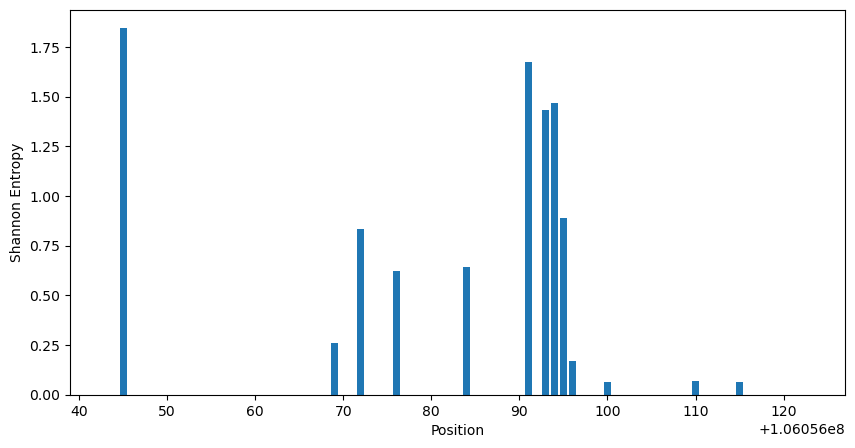

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.bar(pileup['pos'], pileup['ShannonEntropy'])
ax.set_xlim(106056039, 106056127)
ax.set_xlabel('Position')
ax.set_ylabel('Shannon Entropy')

In [15]:
pileup_for_bedgraph = pileup[['chrom', 'pos', 'ShannonEntropy']]
pileup_for_bedgraph['posEnd'] = pileup_for_bedgraph['pos'] + 1
pileup_for_bedgraph = pileup_for_bedgraph[['chrom', 'pos', 'posEnd', 'ShannonEntropy']]

/tmp/ipykernel_1066/4126633128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup_for_bedgraph['posEnd'] = pileup_for_bedgraph['pos'] + 1


In [16]:
with open('CLIP-let7g-gene.bedgraph', 'w') as f:
    f.write('track type=bedGraph' + '\n')
    for _, row in pileup_for_bedgraph.iterrows():
        print(row['chrom'], row['pos'], row['posEnd'], row['ShannonEntropy'], sep='\t', file=f)

In [41]:
pileup_for_bedgraph.to_csv('test.bedgraph', sep='\t', index=False, header=False)

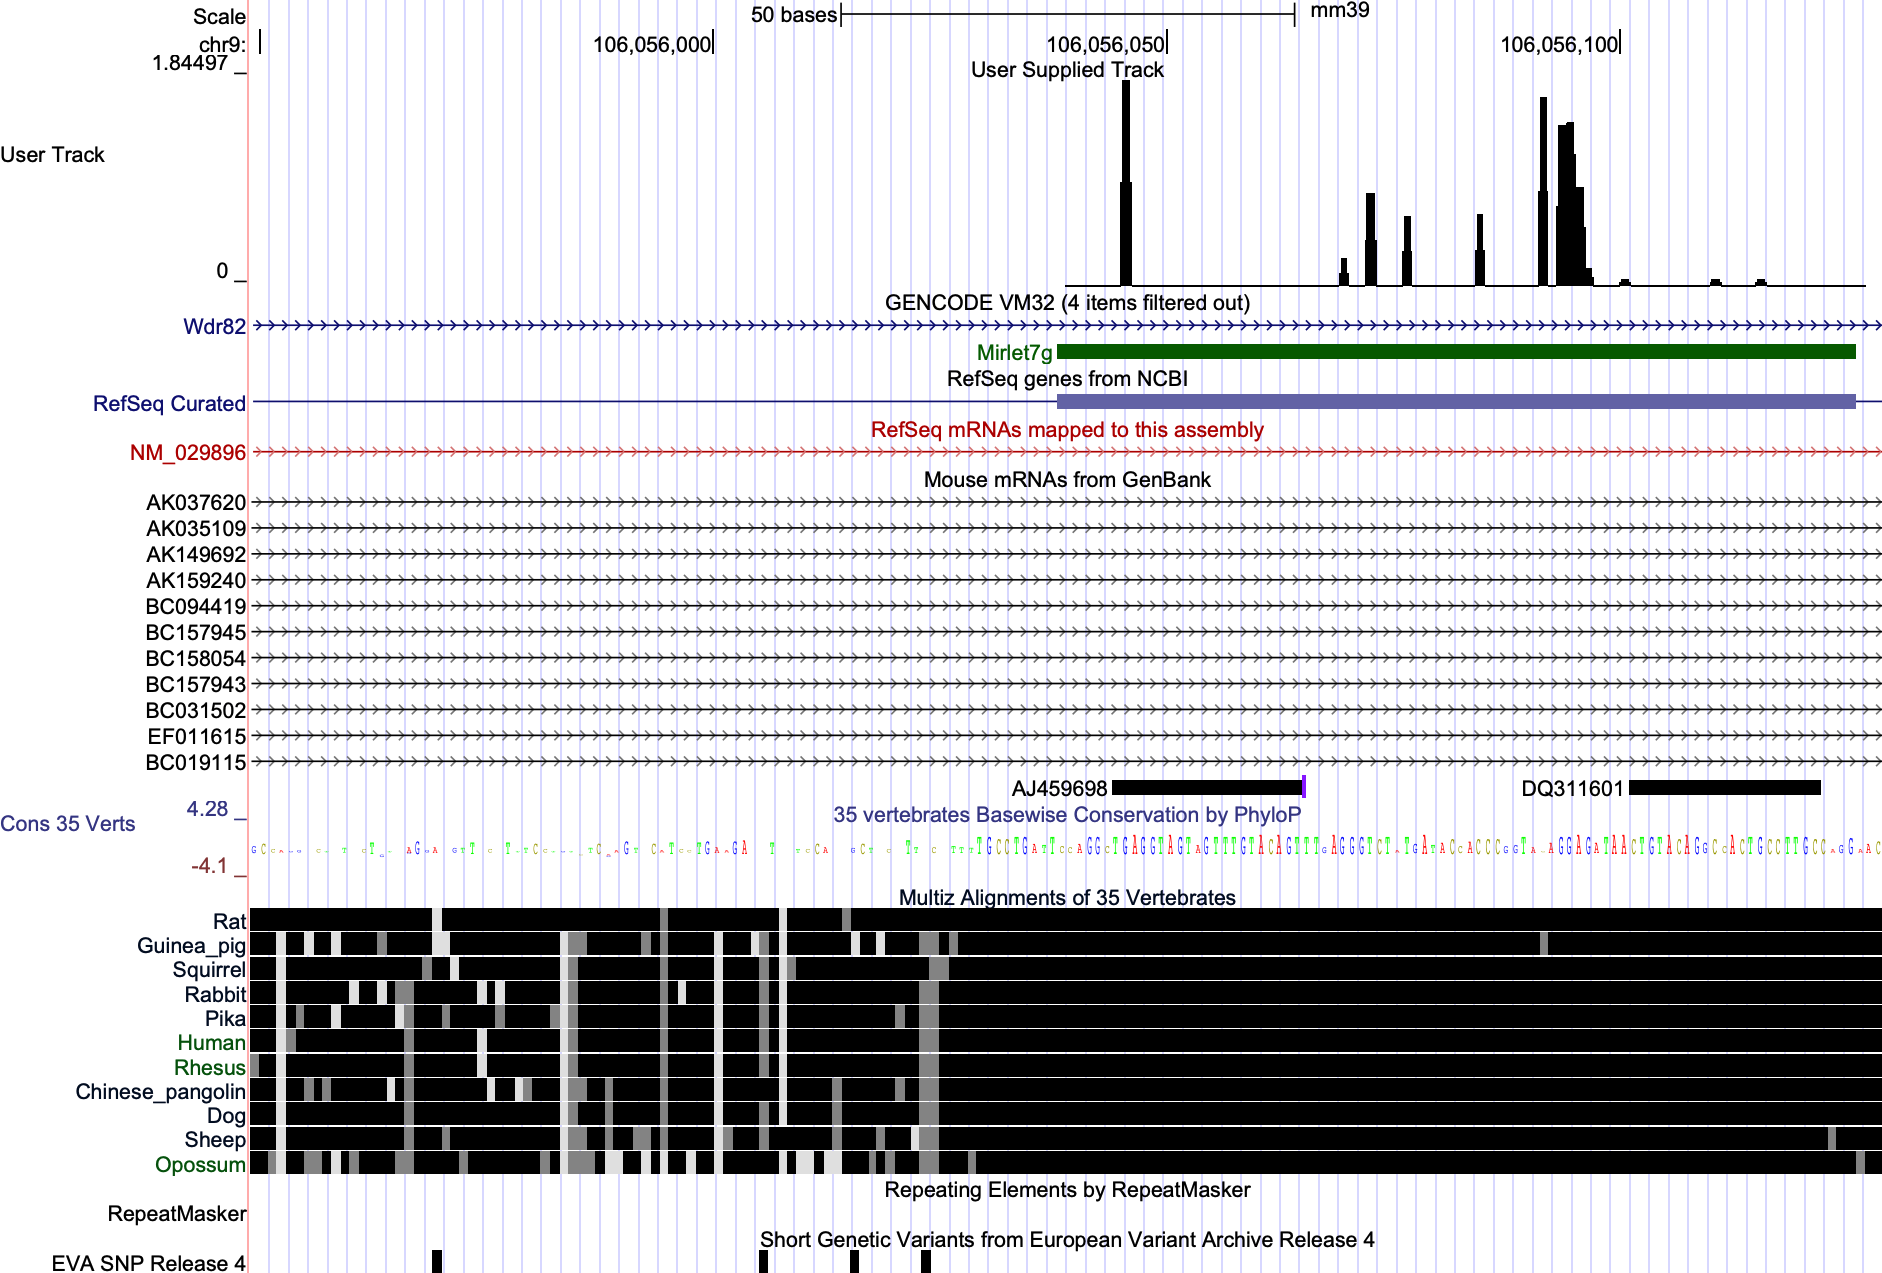

mirlet7d

In [17]:
!grep -i mirlet7d /casa/chemin/p/bioinfo1_2023/binfo1-datapack1/gencode.gtf

chr13	ENSEMBL	gene	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; gene_type "miRNA"; gene_name "Mirlet7d"; level 3; mgi_id "MGI:2676796";
chr13	ENSEMBL	transcript	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; transcript_id "ENSMUST00000083519.3"; gene_type "miRNA"; gene_name "Mirlet7d"; transcript_type "miRNA"; transcript_name "Mirlet7d-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676796"; tag "basic";
chr13	ENSEMBL	exon	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; transcript_id "ENSMUST00000083519.3"; gene_type "miRNA"; gene_name "Mirlet7d"; transcript_type "miRNA"; transcript_name "Mirlet7d-201"; exon_number 1; exon_id "ENSMUSE00000522678.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676796"; tag "basic";


In [21]:
!samtools view -b -o CLIP-let7d.bam CLIP-35L33G.bam chr13:48689488-48689590
!samtools view CLIP-let7d.bam | wc -l

187


In [22]:
!samtools mpileup CLIP-let7d.bam > CLIP-let7d.pileup
!wc -l CLIP-let7d.pileup

[mpileup] 1 samples in 1 input files
87 CLIP-let7d.pileup


In [23]:
!awk '$2 >= 48689488 && $2 <= 48689590 { print $0; }' CLIP-let7d.pileup > CLIP-let7d-gene.pileup
!tail CLIP-let7d-gene.pileup

chr13	48689565	N	6	cccccc	>IGIIH
chr13	48689566	N	6	tttttt	:IGFIH
chr13	48689567	N	6	aaaaaa	8IFIFI
chr13	48689568	N	6	cccccc	?IGIII
chr13	48689569	N	6	tttttt	;IGIII
chr13	48689570	N	5	aaaaa	EDECD
chr13	48689571	N	6	cccccc	:GGIGG
chr13	48689572	N	6	cccccc	:GGIGG
chr13	48689573	N	6	tttttt	5GGIGG
chr13	48689574	N	6	c$c$c$c$c$c$	;GGIGG


In [25]:
pileup_let7d = pd.read_csv('/casa/chemin/p/bioinfo1_2023/binfo1-datapack1/CLIP-let7d-gene.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])
pileup_let7d.tail()

,chrom,pos,_ref,count,basereads,quals
82,chr13,48689570,N,5,aaaaa,EDECD
83,chr13,48689571,N,6,cccccc,:GGIGG
84,chr13,48689572,N,6,cccccc,:GGIGG
85,chr13,48689573,N,6,tttttt,5GGIGG
86,chr13,48689574,N,6,c$c$c$c$c$c$,;GGIGG


In [26]:
toremove_let7d = re.compile('[<>$*#^]')
pileup_let7d['matches'] = pileup_let7d['basereads'].apply(lambda x: toremove_let7d.sub('', x))
pileup_let7d['ShannonEntropy'] = pileup_let7d['matches'].apply(CalcShannonEntropy)
pileup_let7d[['chrom', 'pos', 'matches','ShannonEntropy']]
pileup_let7d

,chrom,pos,_ref,count,basereads,quals,matches,ShannonEntropy
0,chr13,48689488,N,24,^Ga^Ia^Ha^Ia^Ha^Ia^Ia^Ia^Ga^Ia^Ia^Ia^Ia^Ia^Ha^...,BIHGGIHIEIIIGIHIGEGH5BDD,GaIaHaIaHaIaIaIaGaIaIaIaIaIaHaIaGaGaGaIaEaDaHaGa,1.906454
1,chr13,48689489,N,53,aaaaaaaaaaaaaaaaaaaaaaaaa^Ia^Ha^Ia^Ga^Ga^Ha^Ia...,GIHIGIIIEIIIIIHIG>EB4@5HDIHIBEGIID?IIGII@H>IGH...,aaaaaaaaaaaaaaaaaaaaaaaaaIaHaIaGaGaHaIaIaGaGaI...,1.499800
2,chr13,48689490,N,69,tttttttttttttttttttttttttttttttttttttttttttttt...,GIHIGHIFFIIIIIFHGEDG;2>FDIHIDGBIIDBIIDIIAH>IBG...,tttttttttttttttttttttttttttttttttttttttttttttt...,0.988811
3,chr13,48689491,N,105,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,EIGHEHHIEIIIIIHIGCBH:?>HGGHI>GBIIGBIIGIHBB;IHI...,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,1.258637
4,chr13,48689492,N,105,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,GIGIEIEI7IIIGIGIG;?F:D@G7GHIAGAIIG3IIGIHDB2IHI...,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,-0.000000
...,...,...,...,...,...,...,...,...
82,chr13,48689570,N,5,aaaaa,EDECD,aaaaa,-0.000000
83,chr13,48689571,N,6,cccccc,:GGIGG,cccccc,-0.000000
84,chr13,48689572,N,6,cccccc,:GGIGG,cccccc,-0.000000
85,chr13,48689573,N,6,tttttt,5GGIGG,tttttt,-0.000000


Text(0, 0.5, 'Shannon Entropy')

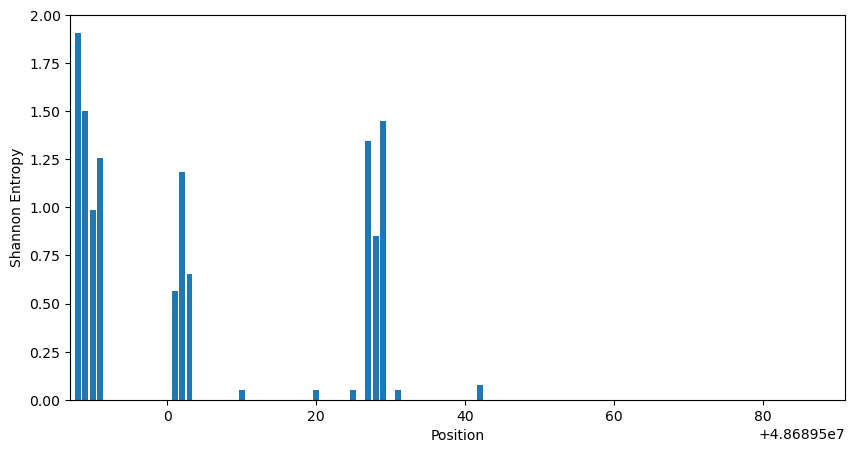

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.bar(pileup_let7d['pos'], pileup_let7d['ShannonEntropy'])
ax.set_xlim(48689487, 48689591)
ax.set_xlabel('Position')
ax.set_ylabel('Shannon Entropy')

In [29]:
pileup_let7d_for_bedgraph = pileup_let7d[['chrom', 'pos', 'ShannonEntropy']]
pileup_let7d_for_bedgraph['posEnd'] = pileup_let7d_for_bedgraph['pos'] + 1
pileup_let7d_for_bedgraph = pileup_let7d_for_bedgraph[['chrom', 'pos', 'posEnd', 'ShannonEntropy']]

/tmp/ipykernel_1066/2182759541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup_let7d_for_bedgraph['posEnd'] = pileup_let7d_for_bedgraph['pos'] + 1


In [30]:
with open('CLIP-let7d-gene.bedgraph', 'w') as f:
    f.write('track type=bedGraph' + '\n')
    for _, row in pileup_let7d_for_bedgraph.iterrows():
        print(row['chrom'], row['pos'], row['posEnd'], row['ShannonEntropy'], sep='\t', file=f)

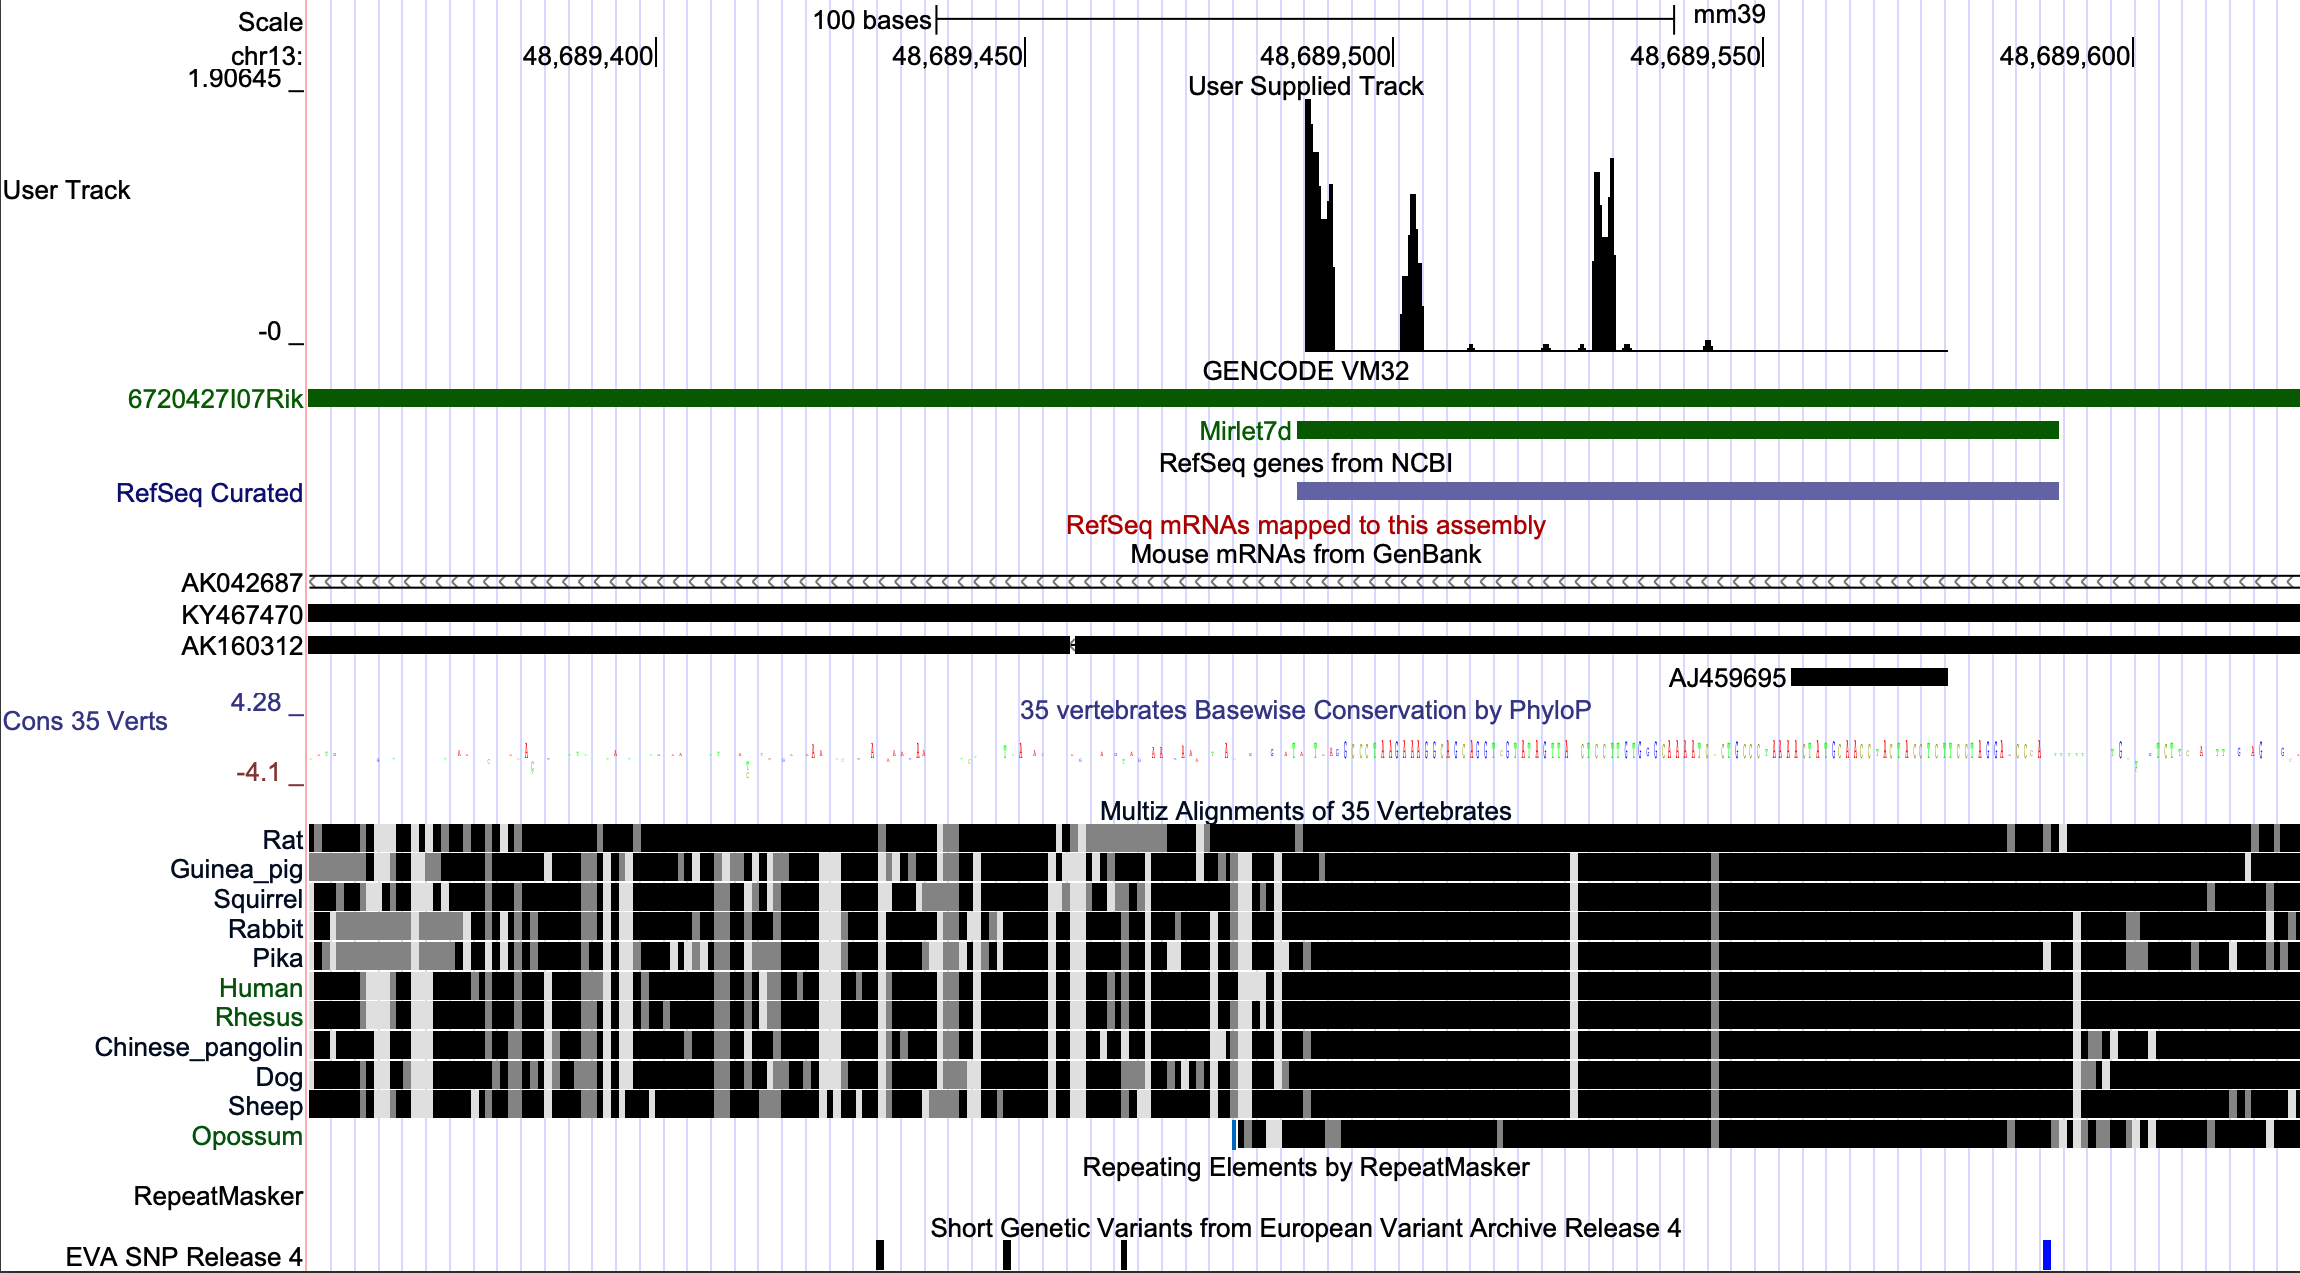

mirlet7f-1

In [31]:
!grep -i mirlet7f-1 /casa/chemin/p/bioinfo1_2023/binfo1-datapack1/gencode.gtf

chr13	ENSEMBL	gene	48691305	48691393	.	-	.	gene_id "ENSMUSG00000105621.3"; gene_type "miRNA"; gene_name "Mirlet7f-1"; level 3; mgi_id "MGI:2676798";
chr13	ENSEMBL	transcript	48691305	48691393	.	-	.	gene_id "ENSMUSG00000105621.3"; transcript_id "ENSMUST00000198652.3"; gene_type "miRNA"; gene_name "Mirlet7f-1"; transcript_type "miRNA"; transcript_name "Mirlet7f-1-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676798"; tag "basic";
chr13	ENSEMBL	exon	48691305	48691393	.	-	.	gene_id "ENSMUSG00000105621.3"; transcript_id "ENSMUST00000198652.3"; gene_type "miRNA"; gene_name "Mirlet7f-1"; transcript_type "miRNA"; transcript_name "Mirlet7f-1-201"; exon_number 1; exon_id "ENSMUSE00001348852.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676798"; tag "basic";


In [32]:
!samtools view -b -o CLIP-let7f-1.bam CLIP-35L33G.bam chr13:48691305-48691393
!samtools view CLIP-let7f-1.bam | wc -l

158


In [33]:
!samtools mpileup CLIP-let7f-1.bam > CLIP-let7f-1.pileup
!wc -l CLIP-let7f-1.pileup

[mpileup] 1 samples in 1 input files
97 CLIP-let7f-1.pileup


In [34]:
!awk '$2 >= 48691305 && $2 <= 48691393 { print $0; }' CLIP-let7f-1.pileup > CLIP-let7f-1-gene.pileup
!tail CLIP-let7f-1-gene.pileup

chr13	48691377	N	24	tttttttttttttttttttttttt	BIIGIGEDCGFIFGI@GHIDDIGI
chr13	48691378	N	24	aaaaaaaaaaaaaaaaaaaaaaaa	?HIFIGGGAFEFABI>GII;EIGI
chr13	48691379	N	24	cccccccccccccccccccccccc	EIIGIGGDEGGIEGI;GIIDDIGI
chr13	48691380	N	24	tttttttttttttttttttttttt	EIIGIBGGEGFIFGI@GIIBDIGI
chr13	48691381	N	24	aaaaaaaaaaaaaaaaaaaaaaaa	BEHFIGEG@FCEAGH4GII;AIDH
chr13	48691382	N	24	cccccccccccccccccccccccc	?IEGIHGG?GEGEBI=GIIDEIGG
chr13	48691383	N	24	cccccccccccccccccccccccc	EIGGIGGGAGFGFGI=GIIDGIGG
chr13	48691384	N	24	tttttttttttttttttttttttt	<IGGIHGG>GEGBGI8GII@GIGG
chr13	48691385	N	24	cccccccccccccccccccccccc	BIGGIBDD?GEGBEI=GIIBGIGG
chr13	48691386	N	24	a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$	EIGGIFDECGFGFGI2BIIDGIGG


In [36]:
pileup_let7f_1 = pd.read_csv('/casa/chemin/p/bioinfo1_2023/binfo1-datapack1/CLIP-let7f-1-gene.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])
pileup_let7f_1.tail()

,chrom,pos,_ref,count,basereads,quals
77,chr13,48691382,N,24,cccccccccccccccccccccccc,?IEGIHGG?GEGEBI=GIIDEIGG
78,chr13,48691383,N,24,cccccccccccccccccccccccc,EIGGIGGGAGFGFGI=GIIDGIGG
79,chr13,48691384,N,24,tttttttttttttttttttttttt,<IGGIHGG>GEGBGI8GII@GIGG
80,chr13,48691385,N,24,cccccccccccccccccccccccc,BIGGIBDD?GEGBEI=GIIBGIGG
81,chr13,48691386,N,24,a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$,EIGGIFDECGFGFGI2BIIDGIGG


In [37]:
toremove_let7f_1 = re.compile('[<>$*#^]')
pileup_let7f_1['matches'] = pileup_let7f_1['basereads'].apply(lambda x: toremove_let7f_1.sub('', x))
pileup_let7f_1['ShannonEntropy'] = pileup_let7f_1['matches'].apply(CalcShannonEntropy)
pileup_let7f_1[['chrom', 'pos', 'matches','ShannonEntropy']]
pileup_let7f_1

,chrom,pos,_ref,count,basereads,quals,matches,ShannonEntropy
0,chr13,48691305,N,109,cccccccccccccccccccccccccccccccccccccccccccccc...,B?IBHBIGI>GGHHH:IIHFGGIIIGHHIHIIBIG?IGBFIE>@II...,cccccccccccccccccccccccccccccccccccccccccccccc...,-0.0
1,chr13,48691306,N,109,tttttttttttttttttttttttttttttttttttttttttttttt...,=GH0H=IBI>IHHGH?IIIGGHBII@HHIGHIDIIIGDHIFGEIHG...,tttttttttttttttttttttttttttttttttttttttttttttt...,-0.0
2,chr13,48691307,N,109,cccccccccccccccccccccccccccccccccccccccccccccc...,;GIBH=IGIAEHH:H:IIIHEHIIIEIDHHIIGII:IIDBI<>GII...,cccccccccccccccccccccccccccccccccccccccccccccc...,-0.0
3,chr13,48691308,N,109,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,AGI?H6IGI?IHHHHBIIIHEHHIIGIHIIIIGII<IIDFIEE<II...,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,-0.0
4,chr13,48691309,N,109,gggggggggggggggggggggggggggggggggggggggggggggg...,>EI>F=IDGEIIHHGBIIIHHHIIIGIHHHIIDII:II5HIGG@II...,gggggggggggggggggggggggggggggggggggggggggggggg...,-0.0
...,...,...,...,...,...,...,...,...
77,chr13,48691382,N,24,cccccccccccccccccccccccc,?IEGIHGG?GEGEBI=GIIDEIGG,cccccccccccccccccccccccc,-0.0
78,chr13,48691383,N,24,cccccccccccccccccccccccc,EIGGIGGGAGFGFGI=GIIDGIGG,cccccccccccccccccccccccc,-0.0
79,chr13,48691384,N,24,tttttttttttttttttttttttt,<IGGIHGG>GEGBGI8GII@GIGG,tttttttttttttttttttttttt,-0.0
80,chr13,48691385,N,24,cccccccccccccccccccccccc,BIGGIBDD?GEGBEI=GIIBGIGG,cccccccccccccccccccccccc,-0.0


Text(0, 0.5, 'Shannon Entropy')

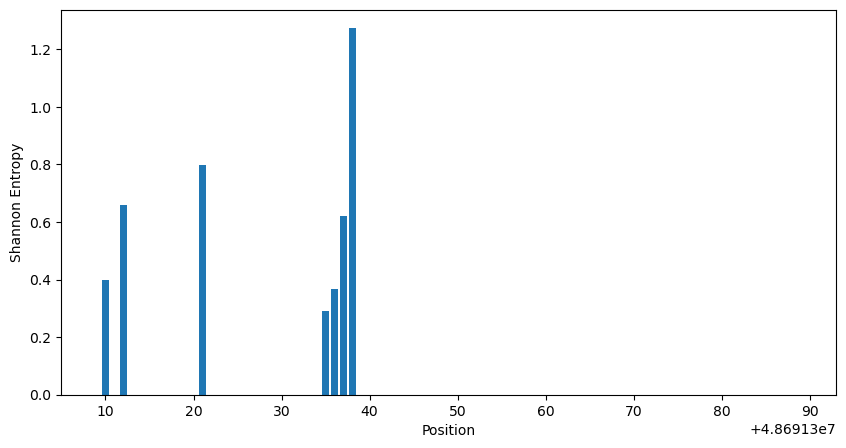

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.bar(pileup_let7f_1['pos'], pileup_let7f_1['ShannonEntropy'])
ax.set_xlim(48691305, 48691393)
ax.set_xlabel('Position')
ax.set_ylabel('Shannon Entropy')

In [39]:
pileup_let7f_1_for_bedgraph = pileup_let7f_1[['chrom', 'pos', 'ShannonEntropy']]
pileup_let7f_1_for_bedgraph['posEnd'] = pileup_let7f_1_for_bedgraph['pos'] + 1
pileup_let7f_1_for_bedgraph = pileup_let7f_1_for_bedgraph[['chrom', 'pos', 'posEnd', 'ShannonEntropy']]

/tmp/ipykernel_1066/1186308348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup_let7f_1_for_bedgraph['posEnd'] = pileup_let7f_1_for_bedgraph['pos'] + 1


In [40]:
with open('CLIP-let7f-1-gene.bedgraph', 'w') as f:
    f.write('track type=bedGraph' + '\n')
    for _, row in pileup_let7f_1_for_bedgraph.iterrows():
        print(row['chrom'], row['pos'], row['posEnd'], row['ShannonEntropy'], sep='\t', file=f)

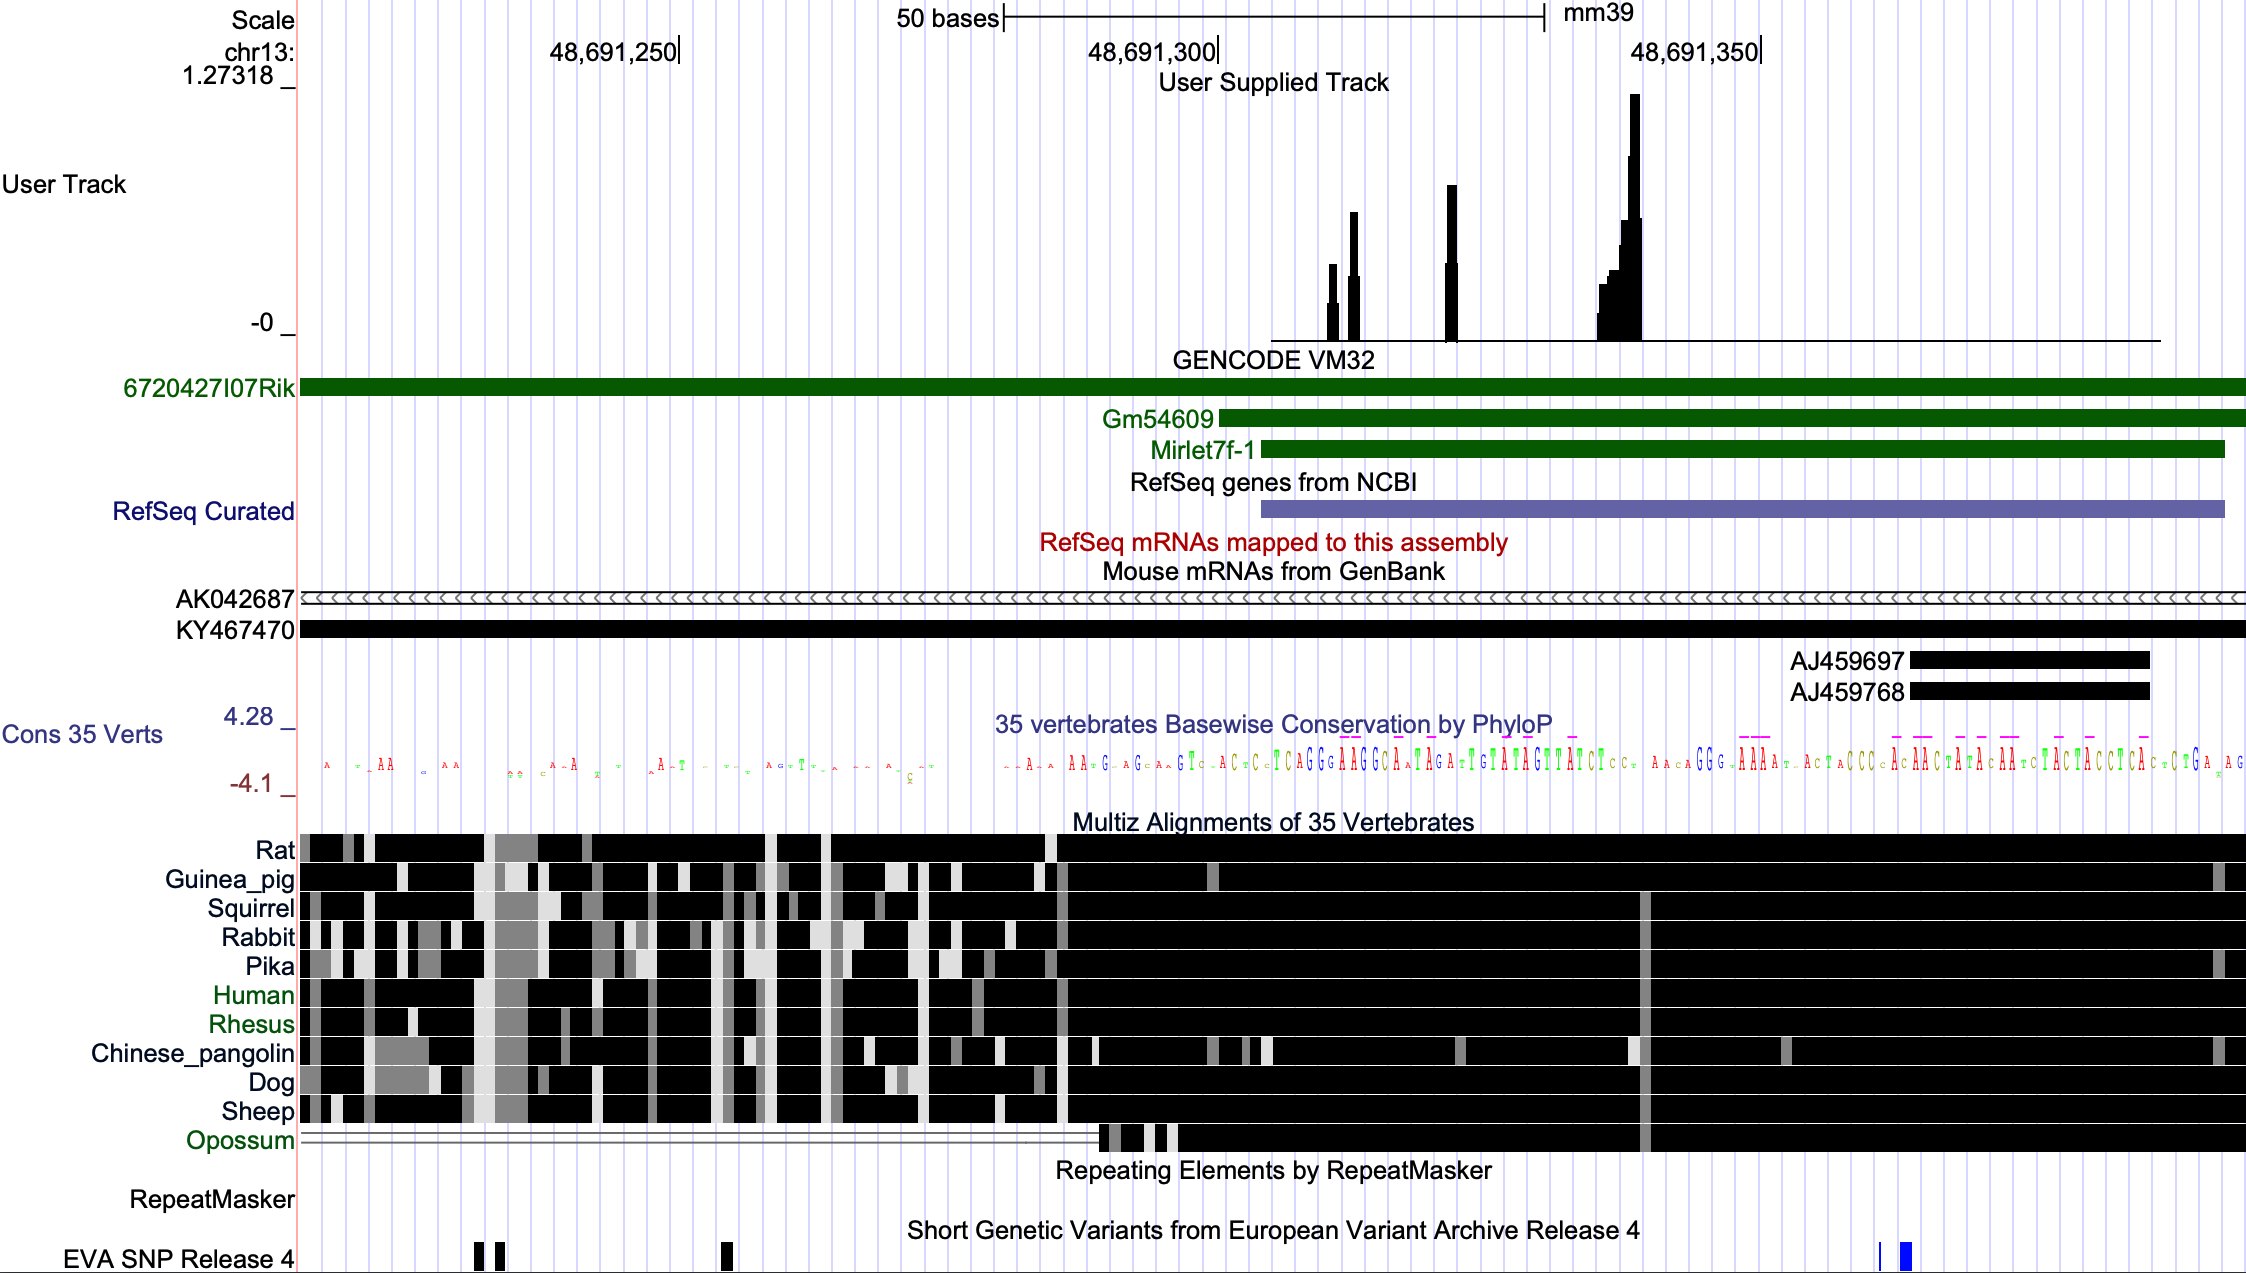